In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/diamonds/diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [4]:
df.shape

(5000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB


### Non sono presenti valori nulli, per cui non è necessaria quella parte di feature engineering che va ad eliminare o a sostituire i nan values

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,5000.0,0.794486,0.468424,0.23,0.40,0.70,1.04,4.13
depth,5000.0,61.711660,1.446206,44.00,61.00,61.80,62.50,70.20
table,5000.0,57.447060,2.258999,51.60,56.00,57.00,59.00,95.00
price,5000.0,3925.539400,3975.452120,-1.00,936.00,2392.50,5369.25,18787.00
x,5000.0,5.725188,1.119156,0.00,4.70,5.69,6.54,10.00
y,5000.0,5.727744,1.112106,0.00,4.71,5.70,6.54,9.85
z,5000.0,3.533076,0.690334,0.00,2.90,3.53,4.03,6.43


In [7]:
print(len(df[df['price'] < 0]))
df[df['price'] < 0]

10


,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


In [8]:
df = df[df['price'] >= 0]

### Notiamo che ci sono delle righe con prezzo negativo (10), il che potrebbe essere frutto di errore di inserimento. Decido di rimuoverle in quanto poche rispetto alla lunghezza totale

In [9]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
df['color'].unique()

array(['H', 'I', 'F', 'G', 'E', 'D', 'J'], dtype=object)

In [11]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [12]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'IF', 'VVS2', 'VS1', 'I1', 'VVS1'],
      dtype=object)

In [13]:
df['mass(g)'] = df['carat'] * 0.2

### Aggiungo la massa in grammi per questioni analitiche, la rimuoverò prima del training

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,mass(g)
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11,0.220
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35,0.258
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18,0.240
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50,0.300
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82,0.180


Text(0, 0.5, 'price')

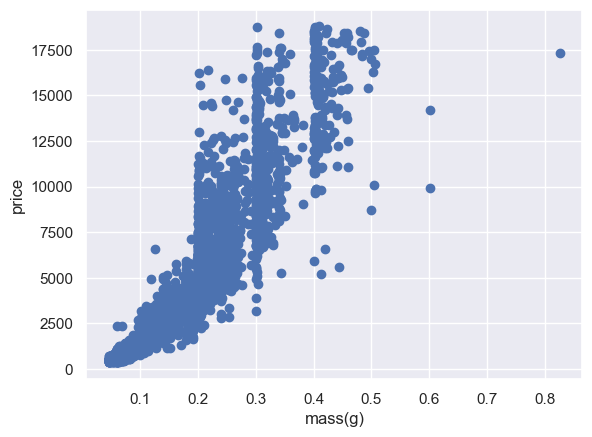

In [15]:
plt.scatter(df['mass(g)'], df['price'])
plt.xlabel('mass(g)')
plt.ylabel('price')

### Com'è facilmente intuibile, possiamo notare che al crescere della massa e quindi dei carati, il prezzo cresce a sua volta

## Numerical variables

In [16]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']

numerical_features

['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'mass(g)']

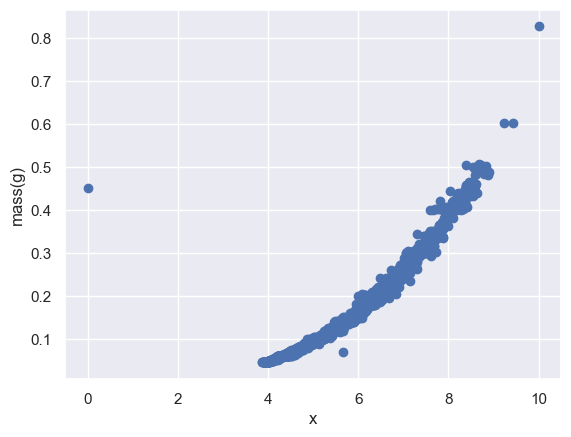

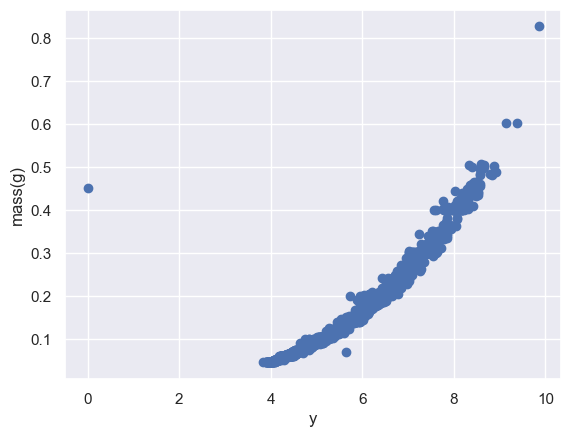

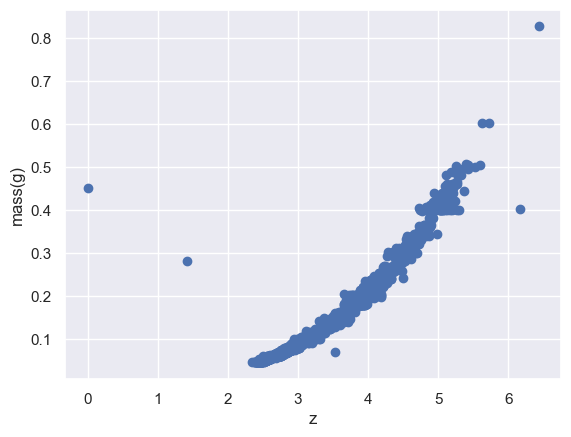

In [17]:
for measure in ['x','y','z']:
    fig, ax = plt.subplots()
    ax.scatter(df[measure], df['mass(g)'])
    ax.set_xlabel(measure)
    ax.set_ylabel('mass(g)')
    plt.show()

### Anche qui troviamo una certa coerenza: all'aumentare delle misure geometriche, aumenta la massa

<Axes: >

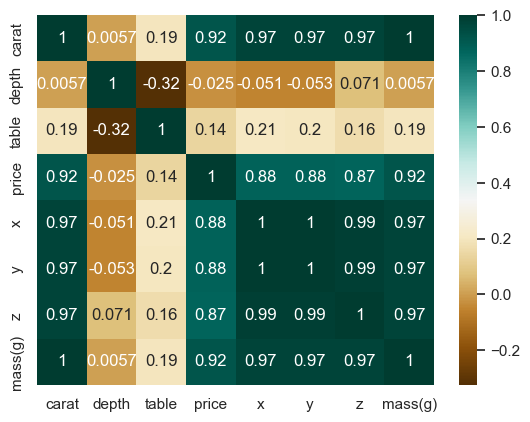

In [18]:
plt.figure()
c = df[numerical_features].corr()
sns.heatmap(c, cmap="BrBG", annot=True)

### Esiste una forte correlazione tra le variabili x,y,z tra di loro, ma anche tra x,y,z e la caratura, quindi in teoria si potrebbero eliminare due fra le tre dimensioni geometriche, o anche applicare tecniche di PCA, ma decido di eliminarle perché la correlazione è forte

### P.S. le avevo tenute inizialmente, ma ho notato che eliminandole l'errore diminuiva e l'R-squared aumentava

In [19]:
df = df.drop(columns=['y','z'])
numerical_features.remove('y')
numerical_features.remove('z')

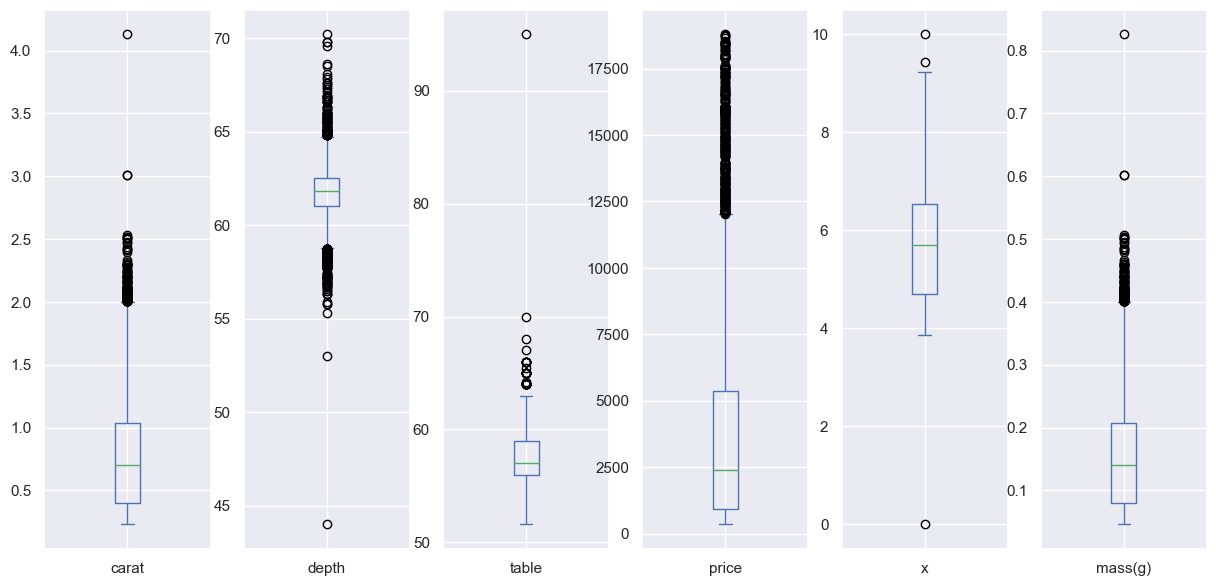

In [20]:
df[numerical_features].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 7))
plt.show()

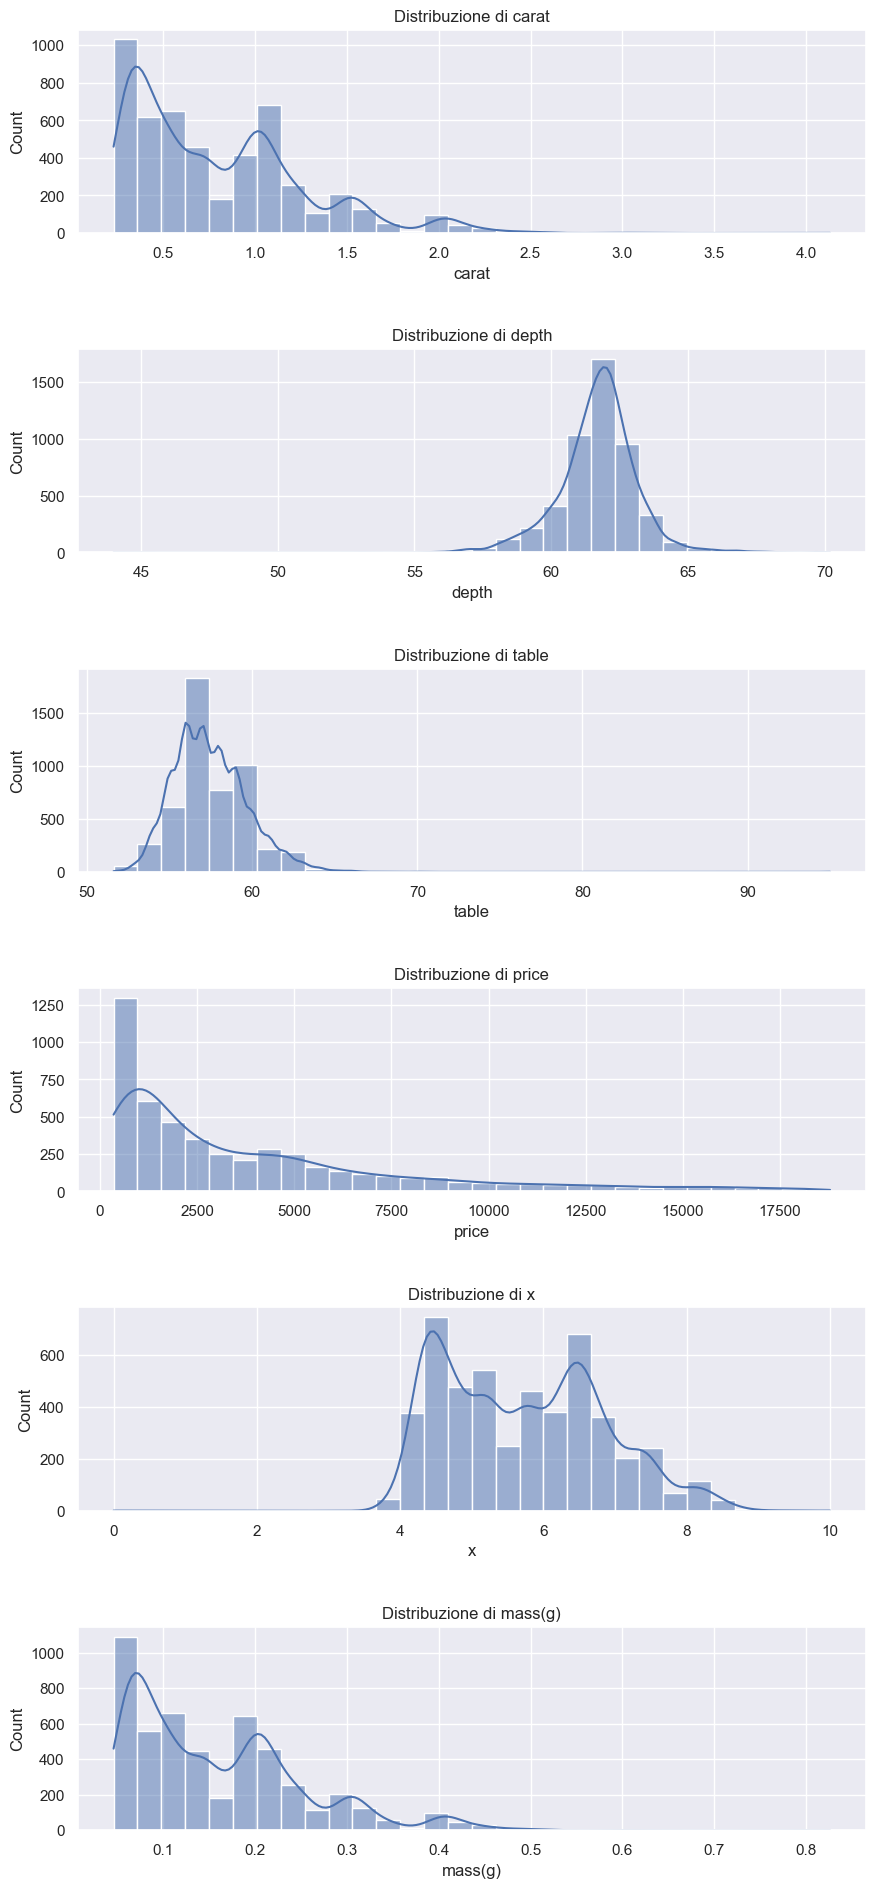

In [21]:
# Visualizzazione della distribuzione delle variabili numeriche
fig, axs = plt.subplots(len(numerical_features), figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribuzione di {col}')

plt.show()

### Notiamo che le distribuzioni di variabili come carat e price sono asimmetriche, il che è normale perché è più comune avere un numero maggiore gioielli meno rari rispetto a gioielli più rari.

In [22]:
df.shape

(4990, 9)

In [23]:
numerical_features_for_outliers = ['carat', 'price']
for nf in numerical_features_for_outliers:
    Q1 = df[nf].quantile(0.25)
    Q3 = df[nf].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtra gli outlier
    df = df[(df[nf] >= lower_bound) & (df[nf] <= upper_bound)]

In [24]:
numerical_features_for_outliers = ['depth', 'table', 'x']
for nf in numerical_features_for_outliers:
    mean = df[nf].mean()
    std_dev = df[nf].std()
    df = df[(df[nf] > mean - 3 * std_dev) & (df[nf] < mean + 3 * std_dev)]

### Utilizzo due tecniche diverse per la rimozione degli outliers:
1. range interquartile per le colonne carat e price: perché la distribuzione è asimmetrica quindi il metodo della std dev non sarebbe stato ideale visto che la distribuzione non è normale. Inoltre, il range interquartile è un metodo meno aggressivo, non volevo stravolgere il dataset eliminando anche gli outliers meno estremi perché i gioelli più rari è giusto che rimangano nel dataset, quindi ho cercato un compromesso
   
2. metodo std dev per depth, table, x: seguono una distribuzione normale, quindi questo metodo è più che adatto

In [25]:
df.shape

(4504, 9)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,4504.0,0.705473,0.364183,0.230,0.370,0.605,1.010,2.00
depth,4504.0,61.748579,1.252138,57.500,61.100,61.800,62.500,66.00
table,4504.0,57.303153,2.059627,52.000,56.000,57.000,59.000,63.00
price,4504.0,3058.740009,2645.798871,351.000,882.000,2042.500,4630.500,11214.00
x,4504.0,5.542569,0.970574,3.860,4.630,5.440,6.410,7.96
mass(g),4504.0,0.141095,0.072837,0.046,0.074,0.121,0.202,0.40


### Si nota come le statistiche sono rimaste simili dopo l'eliminazione degli outliers

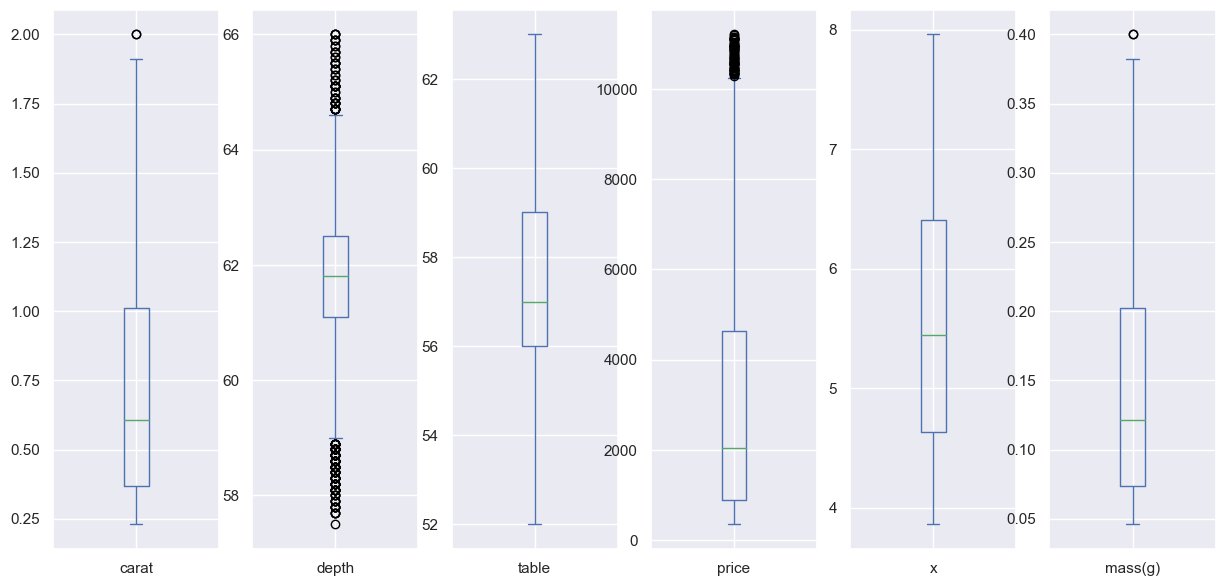

In [27]:
df[numerical_features].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 7))
plt.show()

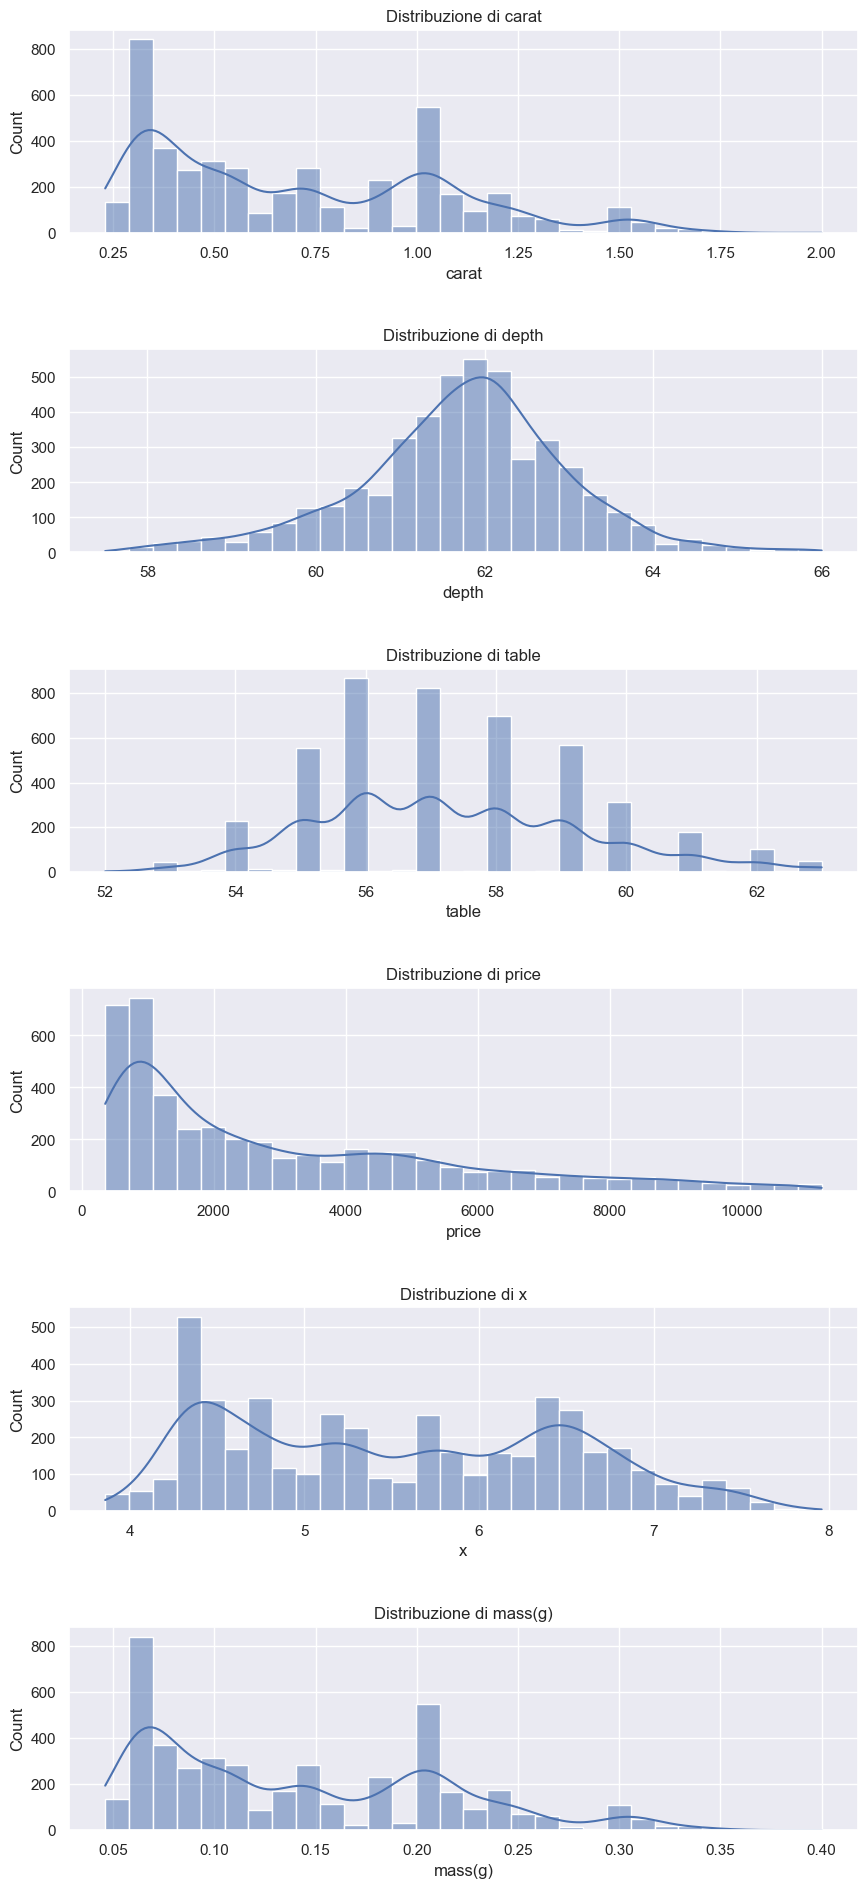

In [28]:
# Visualizzazione della distribuzione delle variabili numeriche
fig, axs = plt.subplots(len(numerical_features), figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribuzione di {col}')

plt.show()

### Visualizzo di nuovo le distribuzioni delle variabili numeriche ed effettivamente si nota un cambiamento in positivo soprattutto delle variabili depth e table

## Categorical variables

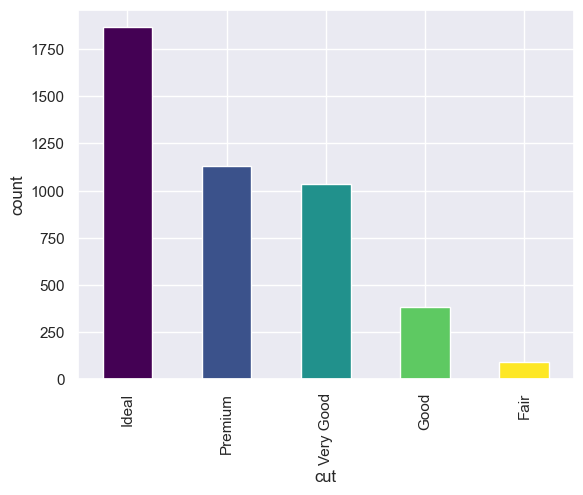

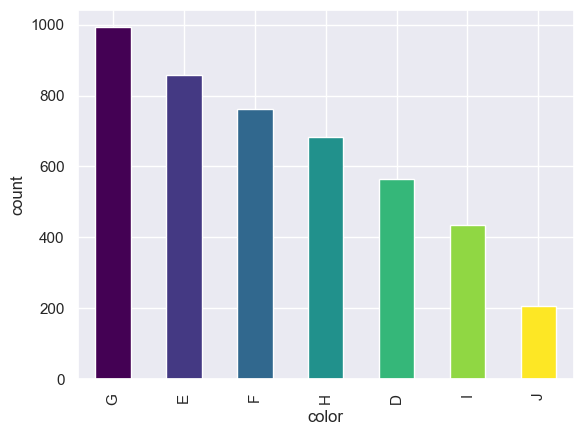

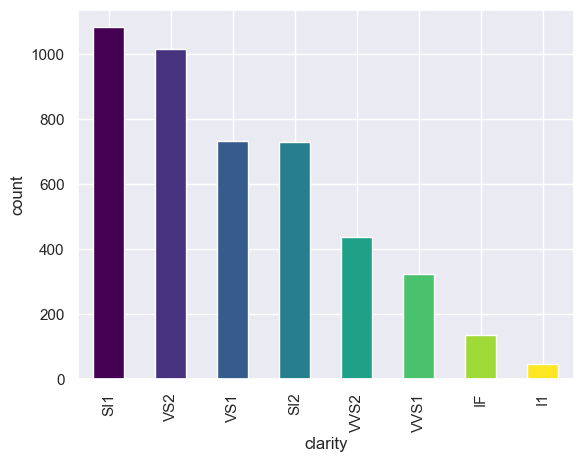

In [29]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

for cf in categorical_features:
    feature_counts = df[cf].value_counts()
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, num=len(feature_counts)))

    # Crea un bar plot con i colori dinamici
    feature_counts.plot(kind='bar', color=colors)
    plt.ylabel('count')
    plt.xlabel(cf)
    plt.show()

### La maggior parte dei diamanti nel dataset ha un taglio "Ideal" e il "podio" dei colori più frequenti indica che tutto sommato la maggior parte dei diamanti ha un'ottima colorazione


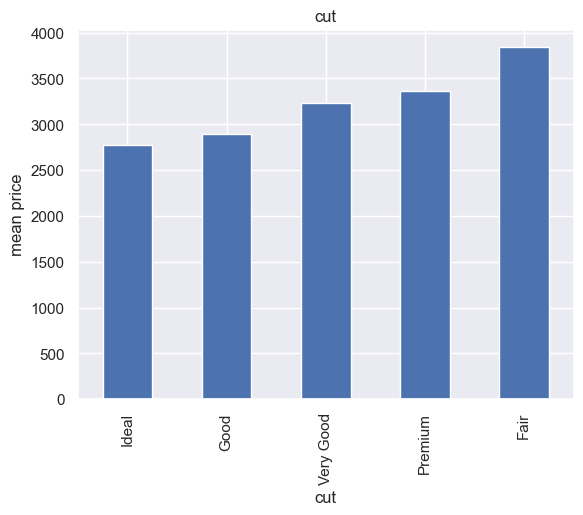

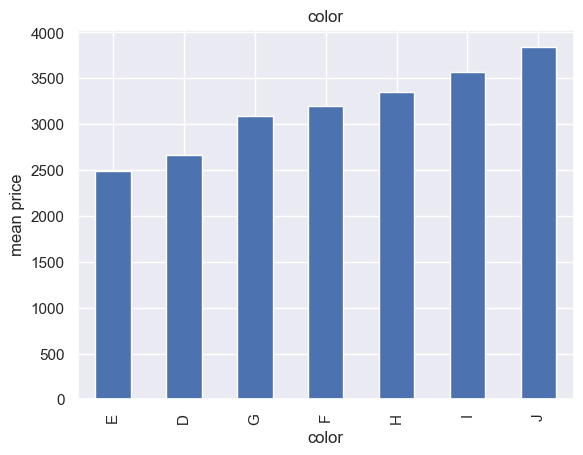

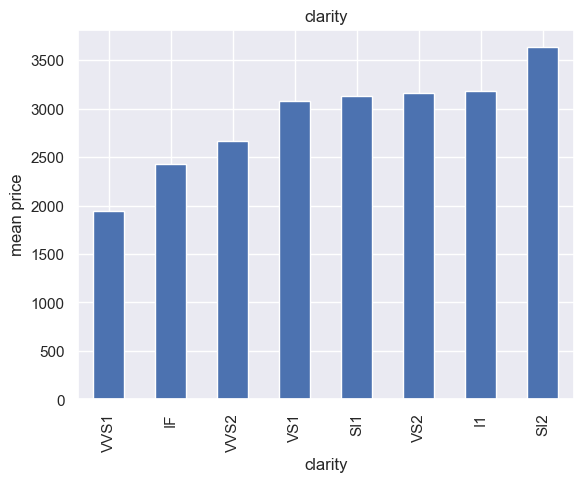

In [30]:
for cf in categorical_features:
    mean_price_by_cat = df.groupby(cf)['price'].mean().sort_values()

    mean_price_by_cat.plot(kind='bar')
    plt.title(cf)
    plt.ylabel('mean price')
    plt.show()

### Analizzando meglio la relazione fra le categorie e il prezzo medio, notiamo però qualche incongruenza: infatti, il prezzo medio è più alto nella categoria 'Fair' del taglio, il che è un controsenso perché è il taglio più scadente. Questo potrebbe essere a causa delle poche righe nel dataset con il valore 'Fair' o per il fatto che la caratura media è eccezionalmente più alta in questo caso. Analizzo in seguito la caratura e la x medie per ogni categoria

<Axes: xlabel='cut', ylabel='carat'>

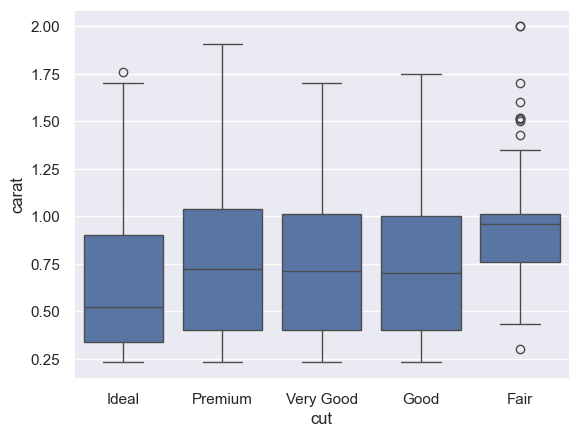

In [31]:
sns.boxplot(data=df, x='cut', y='carat')

<Axes: xlabel='cut', ylabel='x'>

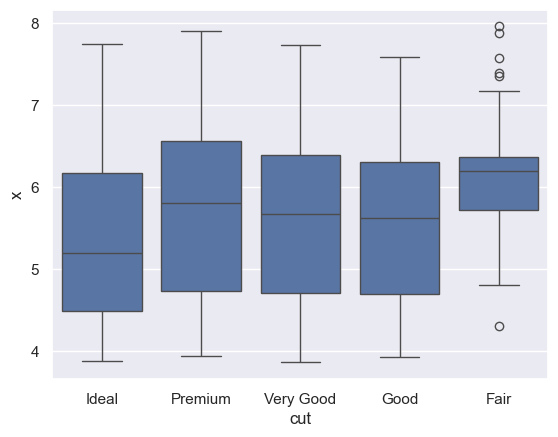

In [32]:
sns.boxplot(data=df, x='cut', y='x')

### Da qui sembra quasi che siano state scambiate per errore le due categorie. Provo a mettere a confronto queste 2 categorie con il resto delle categorie

In [33]:
df_fair = df[(df['cut'] == 'Fair')]
df_ideal = df[(df['cut'] == 'Ideal')]

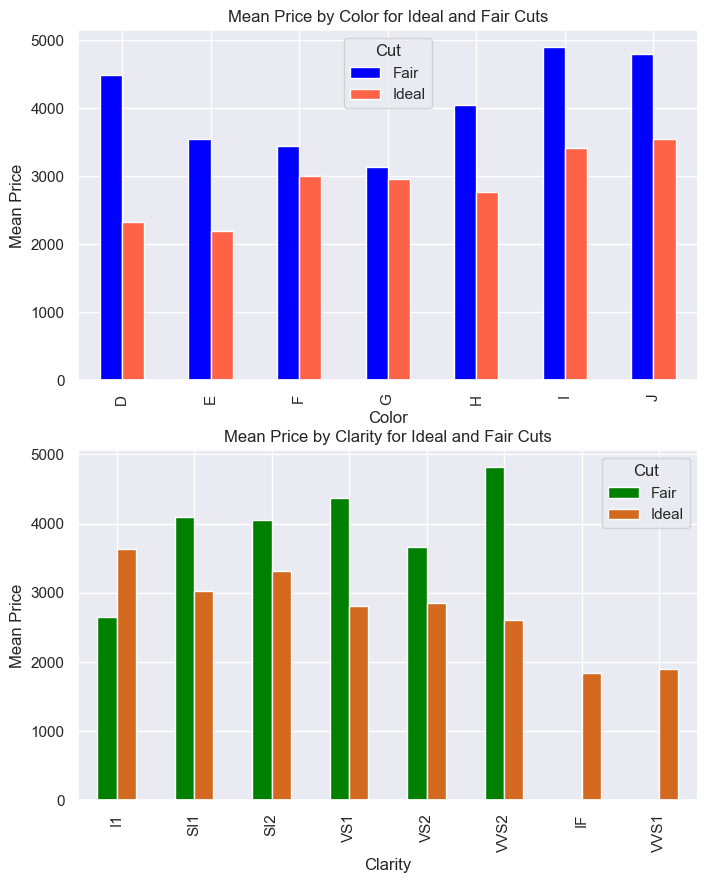

In [34]:
mean_price_by_color_fair = df_fair.groupby('color')['price'].mean()
mean_price_by_color_ideal = df_ideal.groupby('color')['price'].mean()

mean_price_by_clarity_fair = df_fair.groupby('clarity')['price'].mean()
mean_price_by_clarity_ideal = df_ideal.groupby('clarity')['price'].mean()

comparison_fair_ideal_color = pd.concat([mean_price_by_color_fair, mean_price_by_color_ideal], 
                                           axis=1, keys=['Fair', 'Ideal'])

comparison_fair_ideal_clarity = pd.concat([mean_price_by_clarity_fair, mean_price_by_clarity_ideal], 
                                           axis=1, keys=['Fair', 'Ideal'])

# Plot the data
fig, ax = plt.subplots(2, figsize=(8, 10))

comparison_fair_ideal_color.plot(kind='bar', ax=ax[0], color=['blue', 'tomato'])
ax[0].set_title('Mean Price by Color for Ideal and Fair Cuts')
ax[0].set_xlabel('Color')
ax[0].set_ylabel('Mean Price')
ax[0].legend(title='Cut')

comparison_fair_ideal_clarity.plot(kind='bar', ax=ax[1], color=['green', 'chocolate'])
ax[1].set_title('Mean Price by Clarity for Ideal and Fair Cuts')
ax[1].set_xlabel('Clarity')
ax[1].set_ylabel('Mean Price')
ax[1].legend(title='Cut')

plt.show()

In [35]:
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded.head()

,carat,depth,table,price,x,mass(g),cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.10,62.0,55.0,4733,6.61,0.220,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,1.29,62.6,56.0,6424,6.96,0.258,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,1.20,61.1,58.0,5510,6.88,0.240,False,False,False,True,...,True,False,False,False,True,False,False,False,False,False
3,1.50,60.9,56.0,8770,7.43,0.300,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0.90,61.7,57.0,4493,6.17,0.180,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### come metodo di encoding per le variabili categoriche utilizzo il one hot enconding perché evita di introdurre una relazione di ordine fittizia. Inoltre il numero di valori unici per queste colonne non è eccessivo, quindi non aggiunge troppe colonne

In [36]:
df_encoded = df_encoded.drop(columns=['mass(g)'])
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [37]:
X.head()

,carat,depth,table,x,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.10,62.0,55.0,6.61,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1.29,62.6,56.0,6.96,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1.20,61.1,58.0,6.88,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
3,1.50,60.9,56.0,7.43,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.90,61.7,57.0,6.17,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
numerical_columns = ['carat', 'table', 'x', 'depth']

In [41]:
# Applico lo scaler solo alle colonne numeriche
X_train_numerical = scaler.fit_transform(X_train[numerical_columns])
X_test_numerical = scaler.transform(X_test[numerical_columns])

# Ricostruisco i dataframe di training e test
X_train_scaled = pd.DataFrame(X_train_numerical, columns=numerical_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_numerical, columns=numerical_columns, index=X_test.index)

# Aggiungo le colonne categoriche non scalate
X_train_final = pd.concat([X_train_scaled, X_train.drop(numerical_columns, axis=1)], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test.drop(numerical_columns, axis=1)], axis=1)

# # Standardizzazione della variabile target
# scaler_y = StandardScaler()
# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [42]:
from joblib import dump
dump(scaler, 'scaler.joblib')

['scaler.joblib']

### Salvo lo scaler perché mi servirà per scalare i dati che l'utente inserirà sulla web app

In [43]:
reg = LinearRegression()
lassoCV = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10])
ridgeCV = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10])

reg.fit(X_train_final,y_train)
ridgeCV.fit(X_train_final,y_train)
lassoCV.fit(X_train_final,y_train)

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10])

In [44]:
rfr = RandomForestRegressor(oob_score=True)
param_dist = {
    'n_estimators': [10, 20, 30, 50, 100],
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
random_search = RandomizedSearchCV(rfr, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train_final,y_train)
rfr = random_search.best_estimator_
rfr.fit(X_train_final,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestRegressor(max_features='log2', min_samples_split=10, oob_score=True)

In [45]:
y_pred=reg.predict(X_test_final)
y_pred_ridge_cv = ridgeCV.predict(X_test_final)
y_pred_lasso_cv = lassoCV.predict(X_test_final)
y_pred_rfr = rfr.predict(X_test_final)

In [46]:
# linear
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

491938.393148528
502.91414286630993
701.3831999331949


In [47]:
# ridgeCV
mse=mean_squared_error(y_test, y_pred_ridge_cv)
mae=mean_absolute_error(y_test, y_pred_ridge_cv)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

491788.734682505
502.8592337286407
701.2765037290961


In [48]:
# lassoCV
mse=mean_squared_error(y_test, y_pred_lasso_cv)
mae=mean_absolute_error(y_test, y_pred_lasso_cv)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

491805.1722013816
502.70464751268133
701.2882233442834


In [49]:
# random forest
mse=mean_squared_error(y_test, y_pred_rfr)
mae=mean_absolute_error(y_test, y_pred_rfr)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

282994.34671460406
339.68196529759666
531.9721296408338


### I modelli lineari tra di loro performano in maniera molto simile, complice probabilmente la scarsa complessità del dataset. Spicca il random forest usato come regressor, nettamente superiore rispetto agli altri

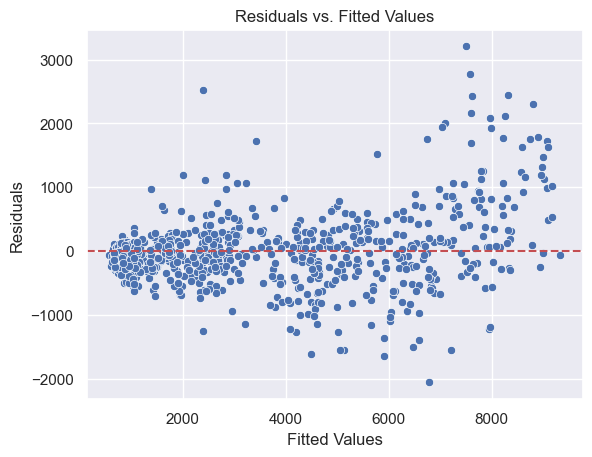

In [50]:
residuals = y_test-y_pred_rfr
sns.scatterplot(x=y_pred_rfr, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

### Si nota come i residui sono distribuiti intorno allo zero, il che è una cosa positiva.

### La variabile target del prezzo non è stata normalizzata per questioni analitiche. Ho provato a normalizzarla e i risultati erano identici

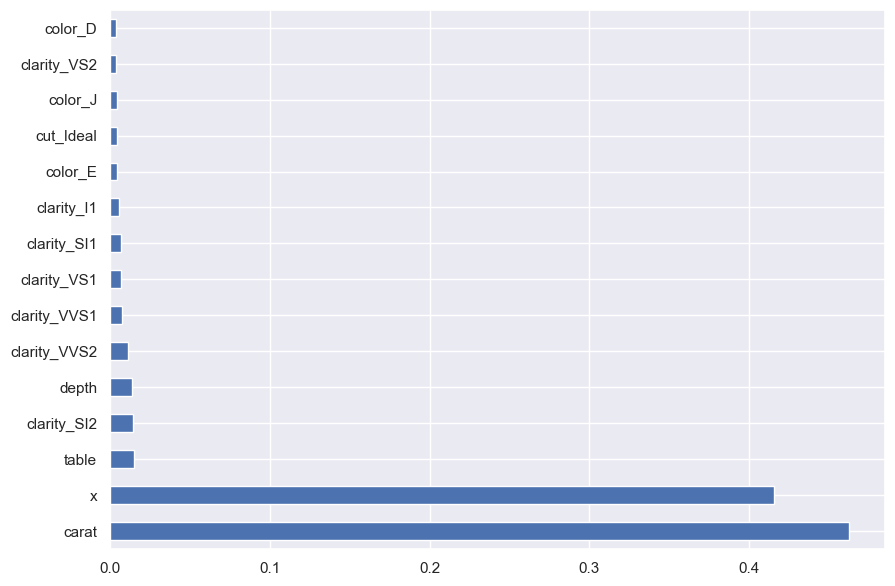

In [51]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rfr.feature_importances_, index = X_train_final.columns)
feat_importances.nlargest(15).plot(kind='barh');

### Notiamo che le feature che più aiutano nella predizione sono prevalentemente le feature numeriche

In [52]:
np.set_printoptions(suppress=True)

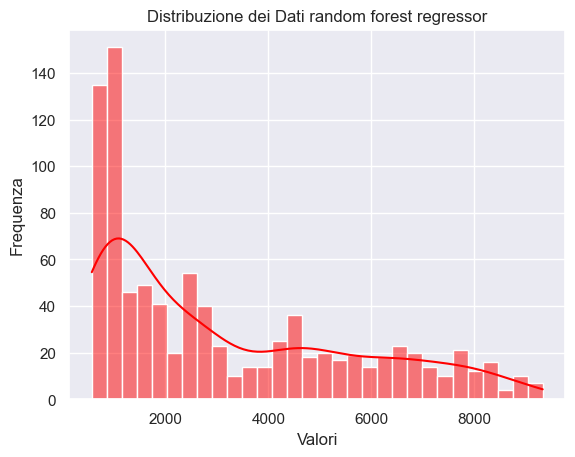

In [53]:
sns.histplot(y_pred_rfr, kde=True, color="red", bins=30)
plt.title('Distribuzione dei Dati random forest regressor')
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.grid(True)
plt.show()

In [54]:
# R squared
score=r2_score(y_test,y_pred)
score_ridge_cv=r2_score(y_test,y_pred_ridge_cv)
score_lasso_cv=r2_score(y_test,y_pred_lasso_cv)
score_rfr=r2_score(y_test,y_pred_rfr)
print(score)
print(score_ridge_cv)
print(score_lasso_cv)
print(score_rfr)

0.9298382941790101
0.9298596389112225
0.9298572945437571
0.959638510879149


### L'R squared è ottimo in tutti i modelli, per cui significa che che le variabili indipendenti riescono a predire bene i valori della variabile dipendente. Il random forest è nettamente migliore degli altri

In [55]:
# salvo il modello
import pickle
with open('rfr.pkl','wb') as f:
    pickle.dump(rfr,f)

### Salvo anche il modello per le predizioni future

In [56]:
import statsmodels.api as sm

In [57]:
model=sm.OLS(y_train,X_train_final.astype(float)).fit()

In [58]:
y_pred_ols=model.predict(X_test_final.astype(float))

In [59]:
model.rsquared

0.9288985057123097

In [60]:
model.rsquared_adj

0.9284815463769169

In [61]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     2228.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:18:23   Log-Likelihood:                -28742.
No. Observations:                3603   AIC:                         5.753e+04
Df Residuals:                    3581   BIC:                         5.766e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat          3900.6150     78.190     49.887

### Qui utilizzo il metodo dei minimi quadrati, che non è un vero e proprio training ma una formula chiusa. In questo caso il dataset è piccolo quindi non ha portato problemi di computazione. L'ho utilizzato per questioni analitiche e per controllare i coefficienti e i p-values.

### E' possibile notare come i coefficienti influiscano sulla predizione del prezzo. Ad esempio all'aumentare di un'unità di carato, il prezzo aumenta di 3900.

### Inoltre si nota la coerenza del taglio (variabile 'cut'), in cui man mano che si sale da Fair a Ideal, il coefficiente influisce incrementando il prezzo

### Così come anche la purezza: 'IF' che significa purezza massima corrisponde al maggior aumento di prezzo

### Infine, si può apprezzare un valore basso di tutti i p-values, il che vuol dire che tutte le features contribuiscono significativamente alla predizione finale